___

# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">**Deep Learning**- CNN</h1>

# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Churn Prediction for Bank Customer</h1>




___

## Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


## Indest Data

In [5]:
df = pd.read_csv("/content/Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [7]:
#Tenure:Number of years for which the customer has been with the bank
#NumOfProducts :Number of bank products the customer is utilising
#Exited: target column, Binary flag 1 if the customer closed account with bank and 0 if the customer is retained
#Balance: the amount of money you have in a bank account, or the amount of something that you have left after you have spent or used up the rest

In [8]:
df.shape

(10000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [11]:
pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)


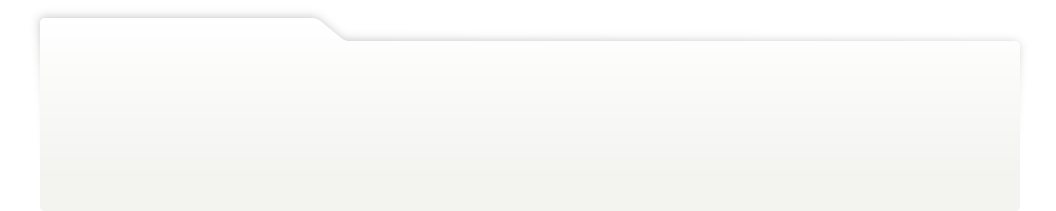
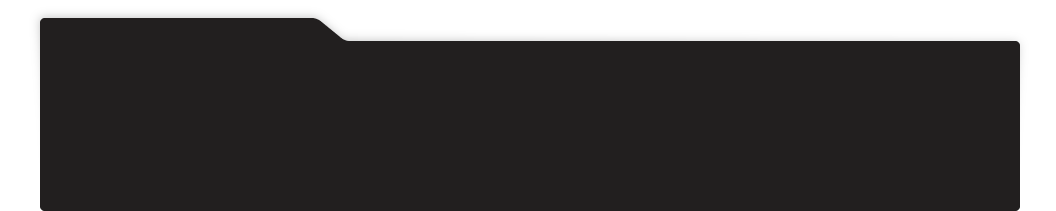
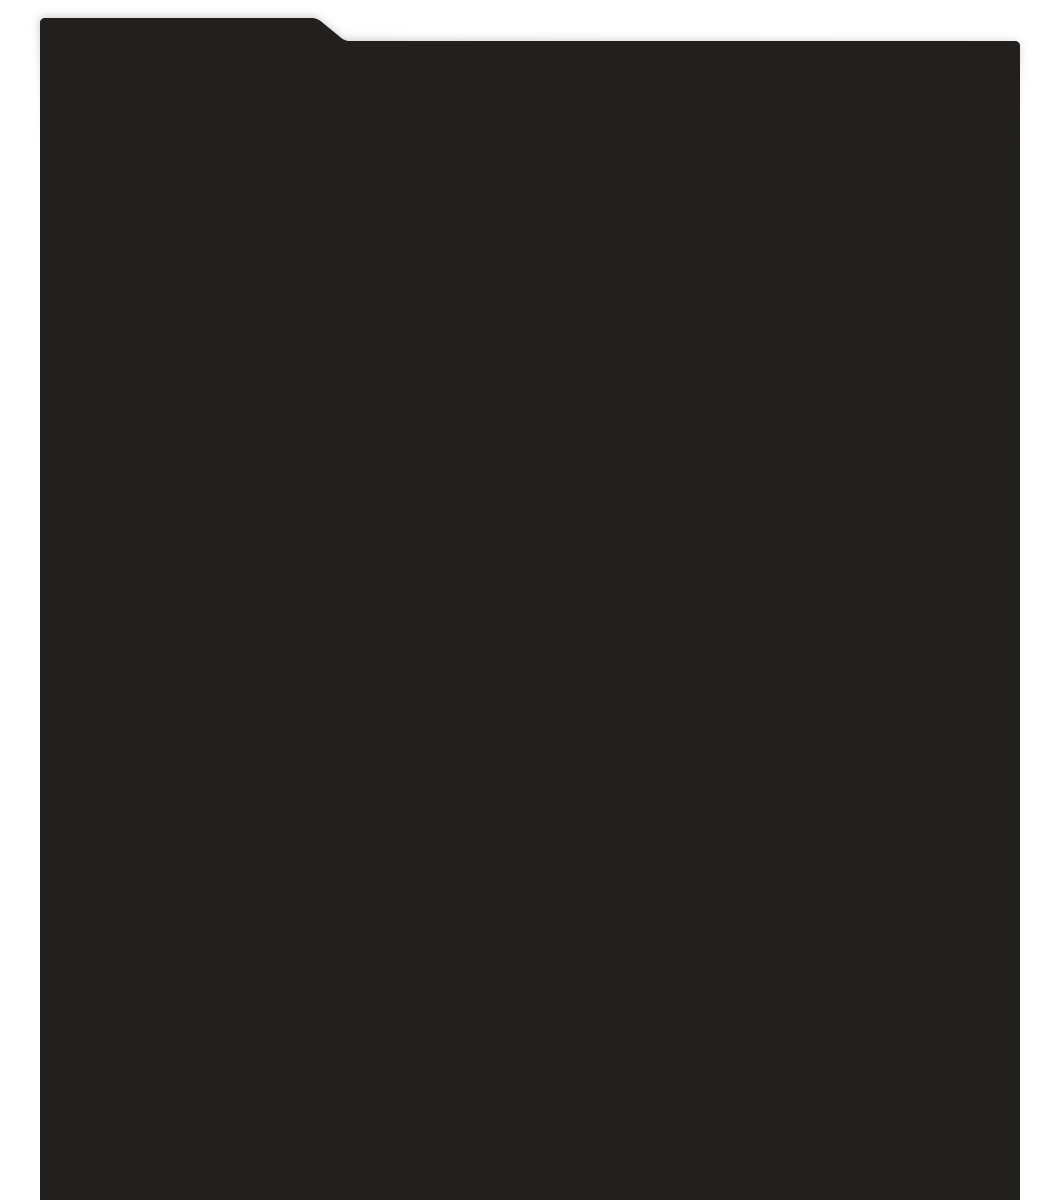
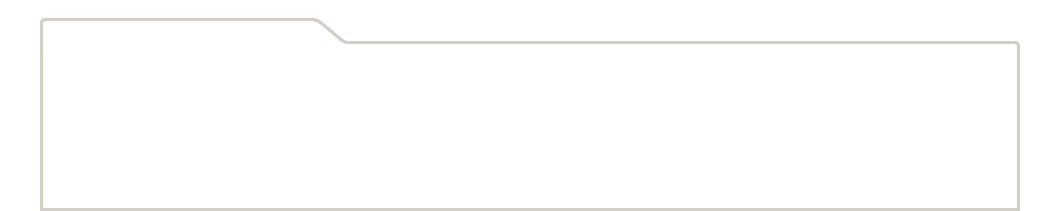
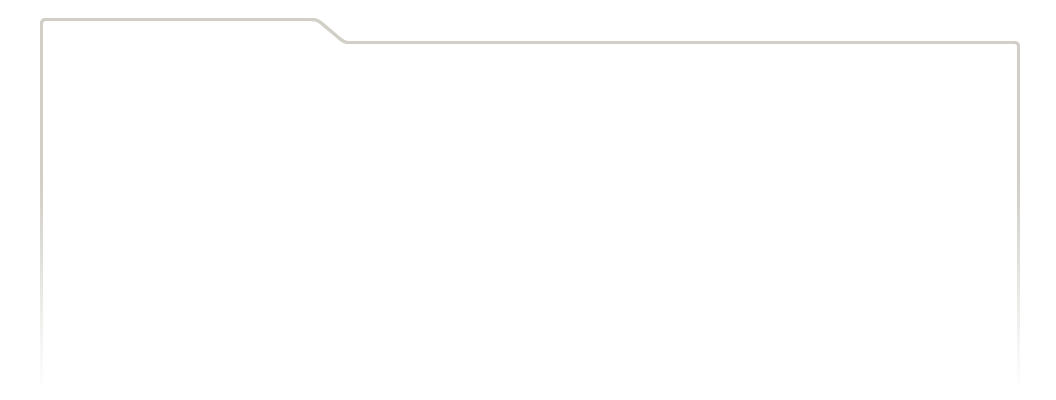
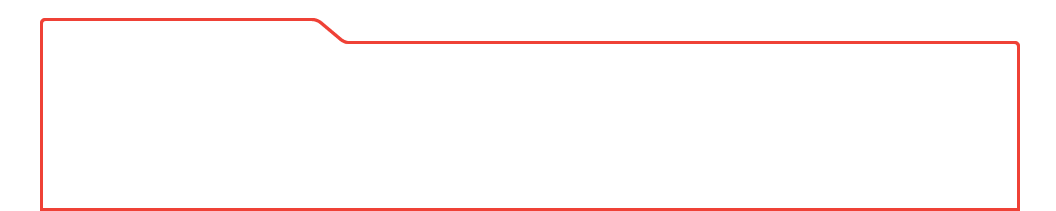
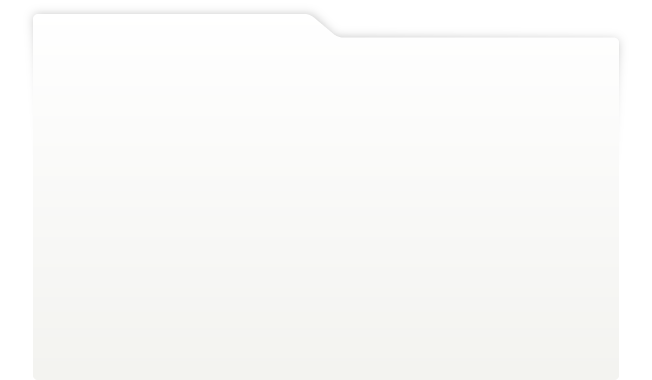
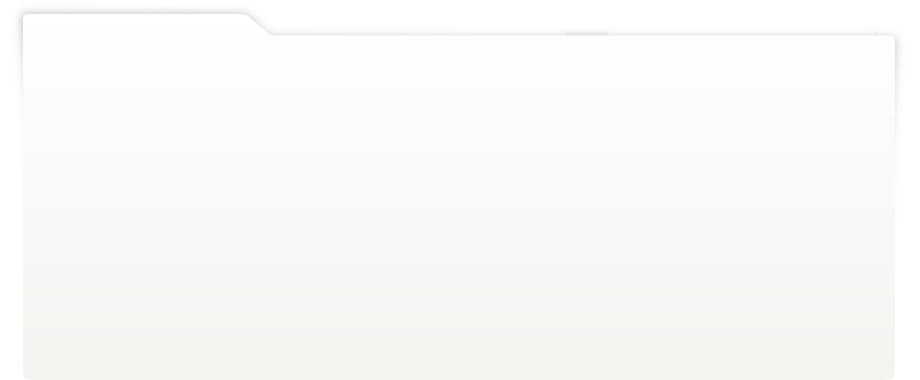
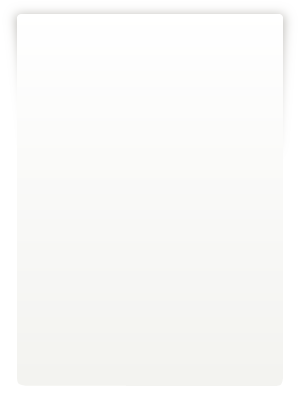
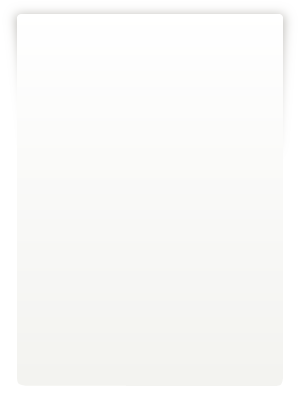
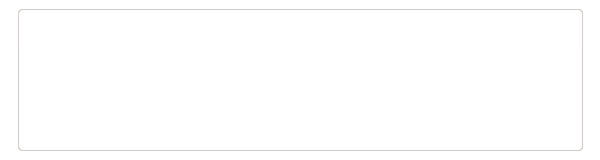
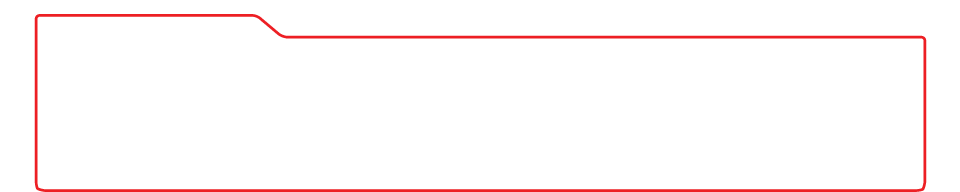
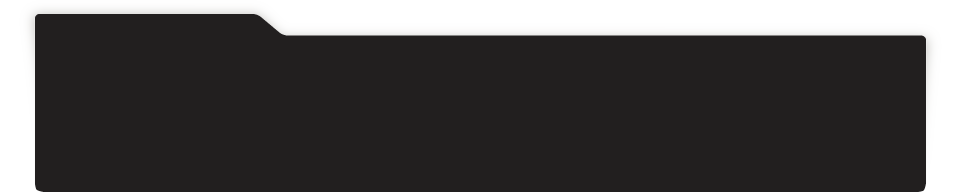
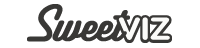
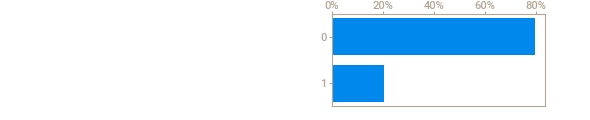
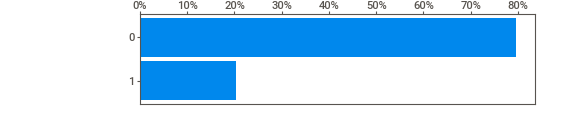
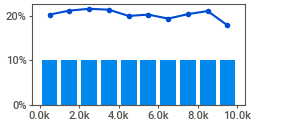
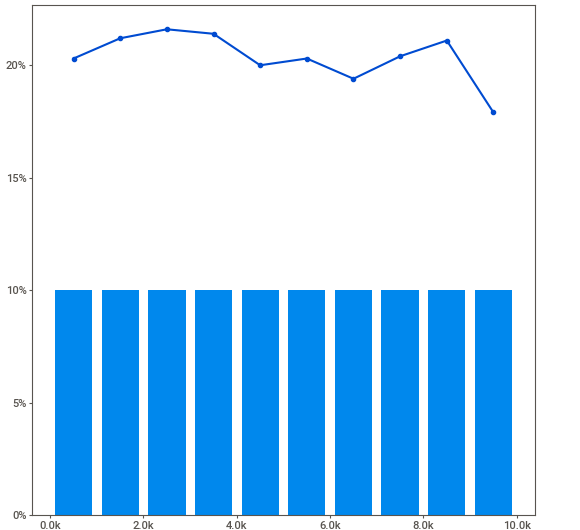
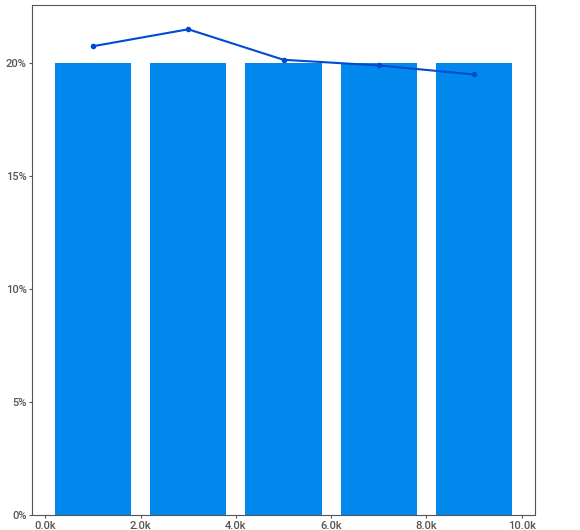
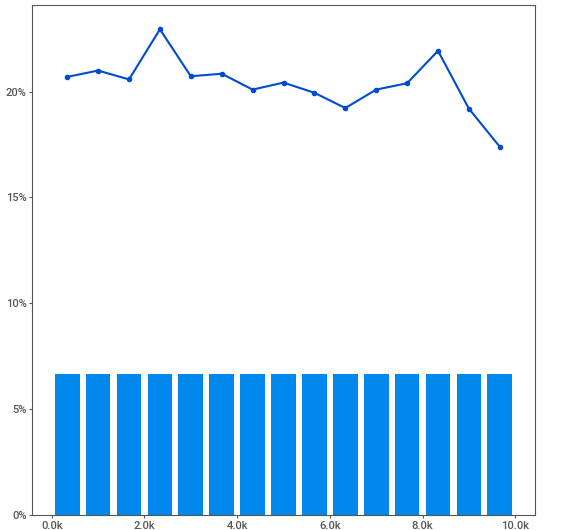
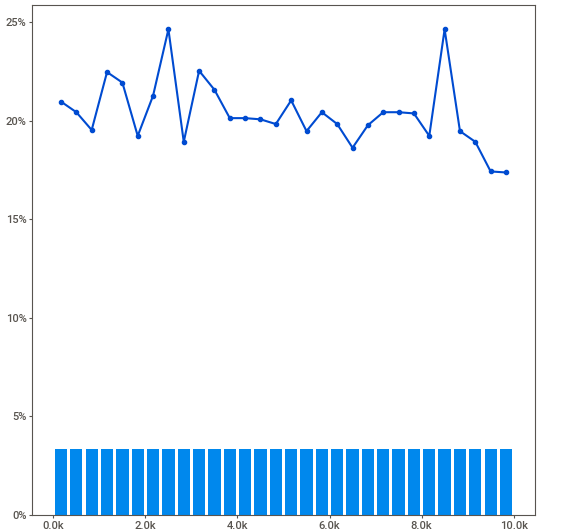
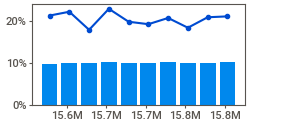
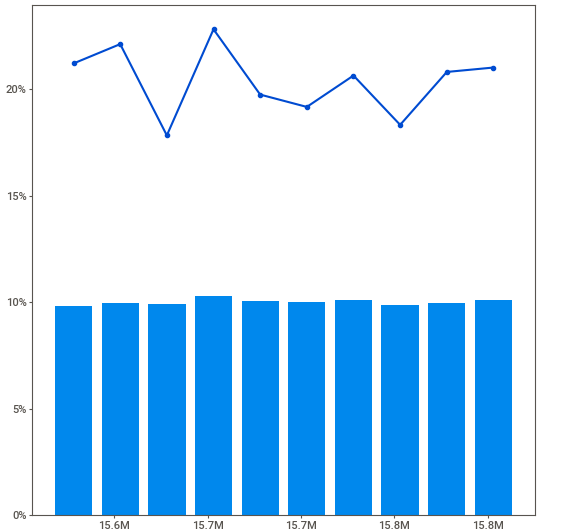
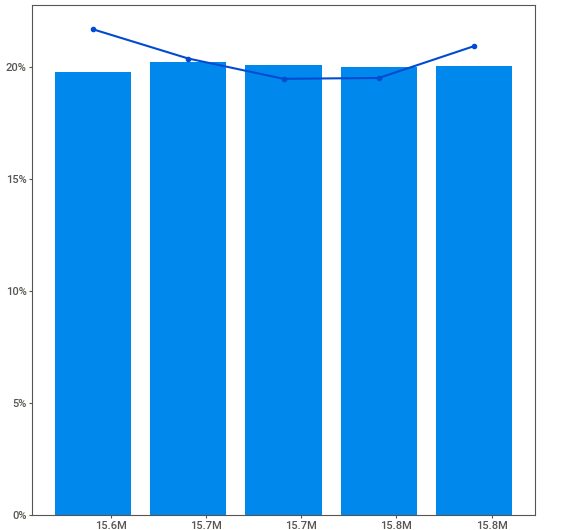
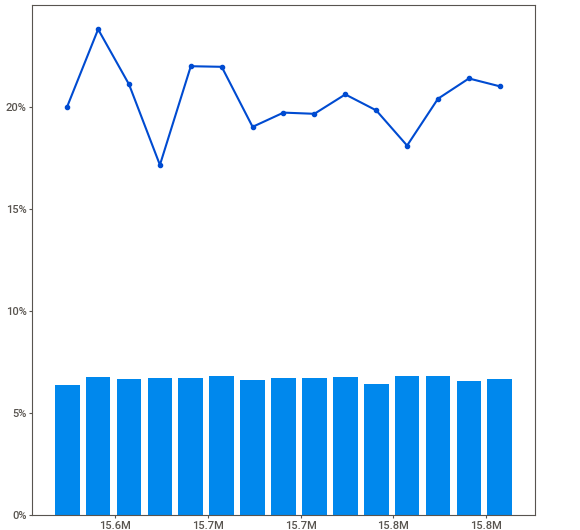
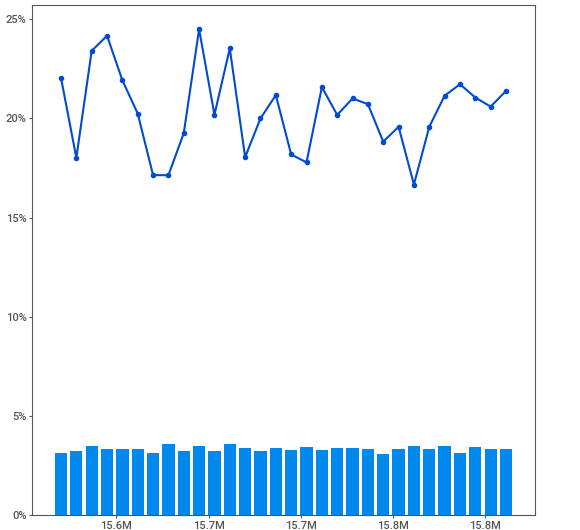
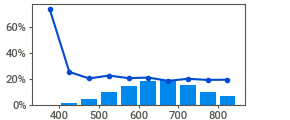
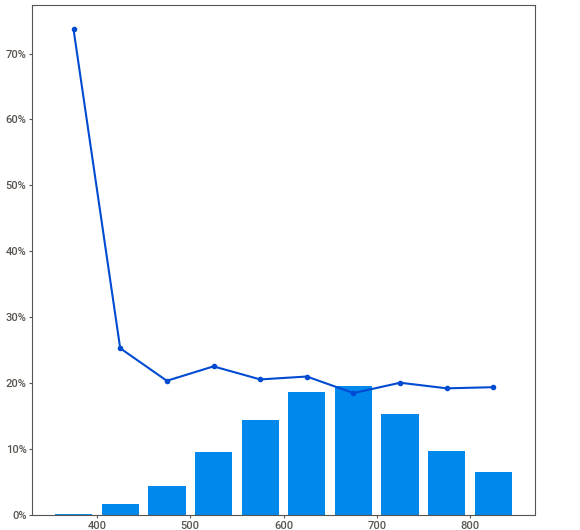
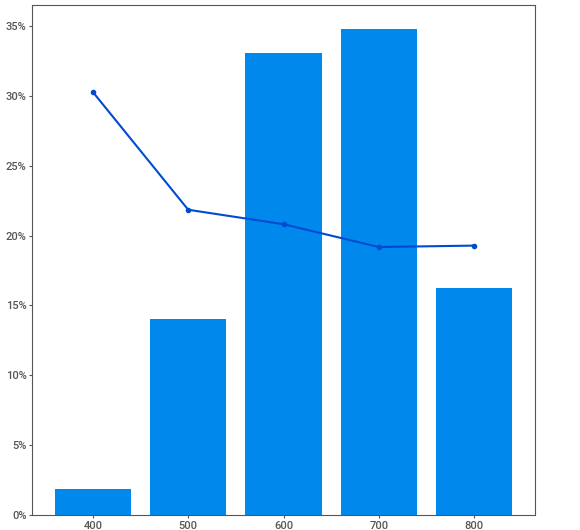
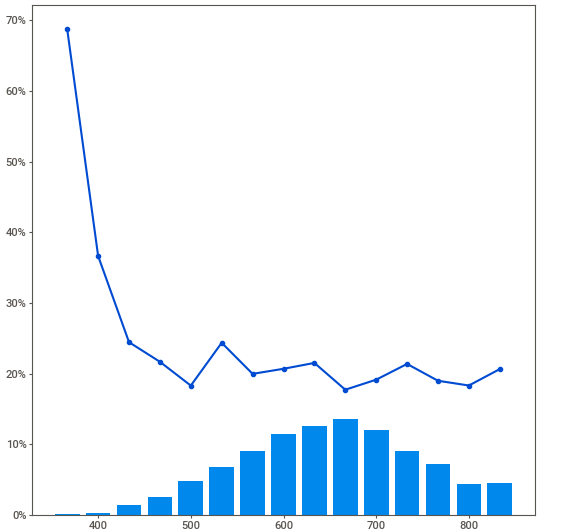
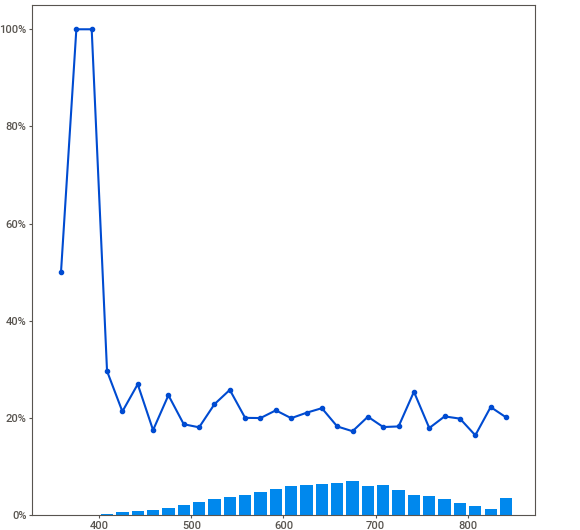
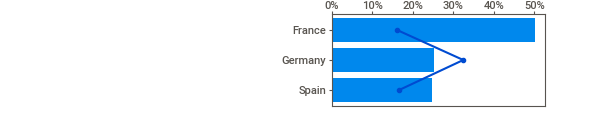
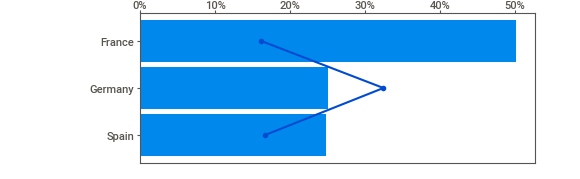
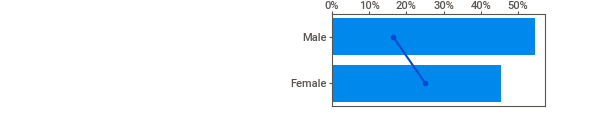
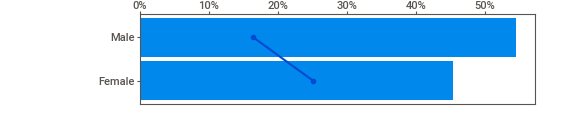
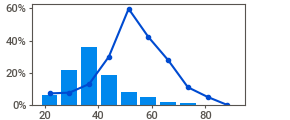
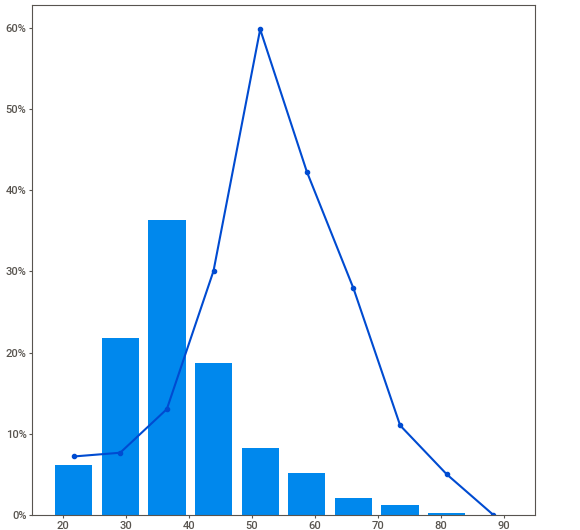
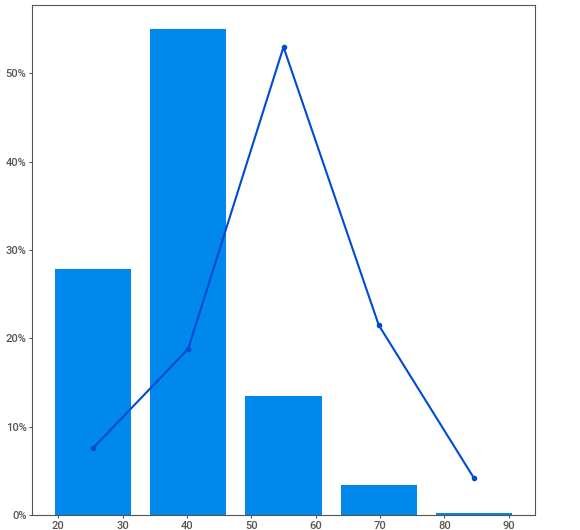
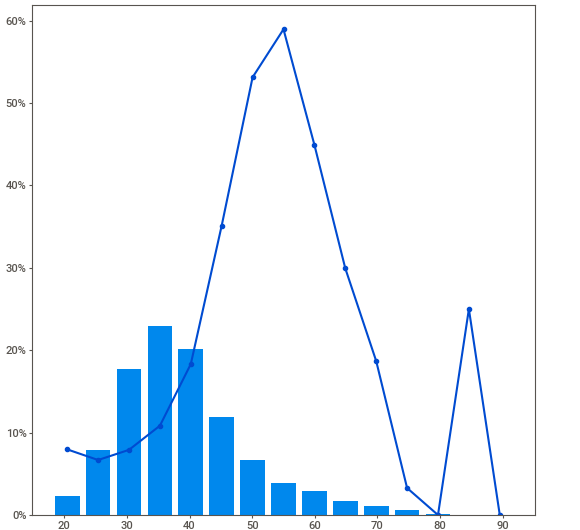
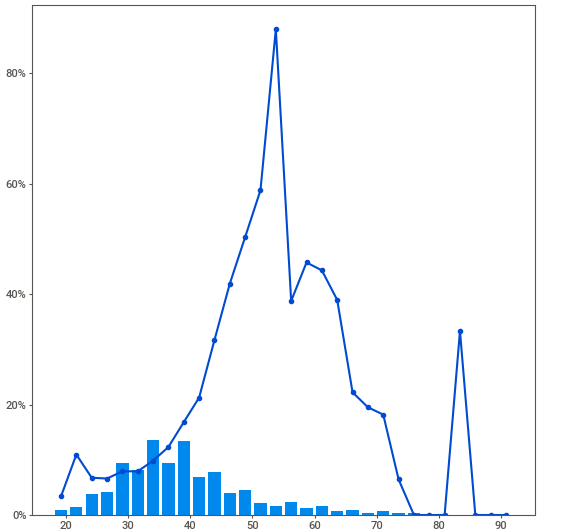
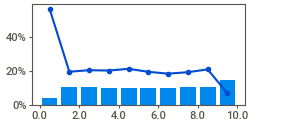
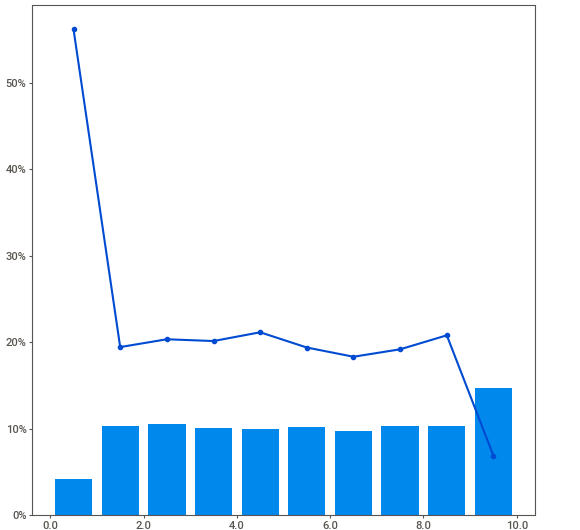
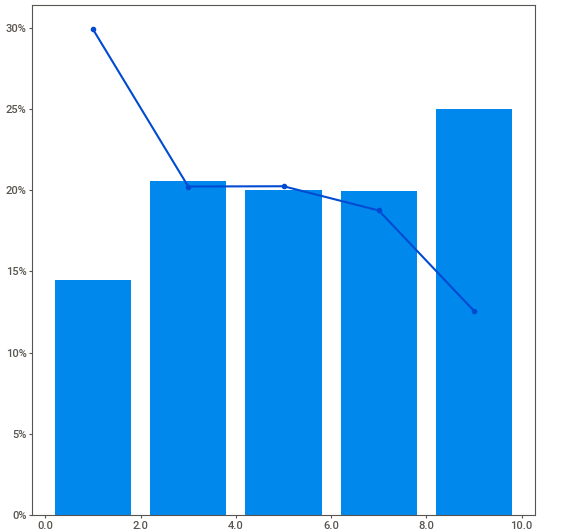
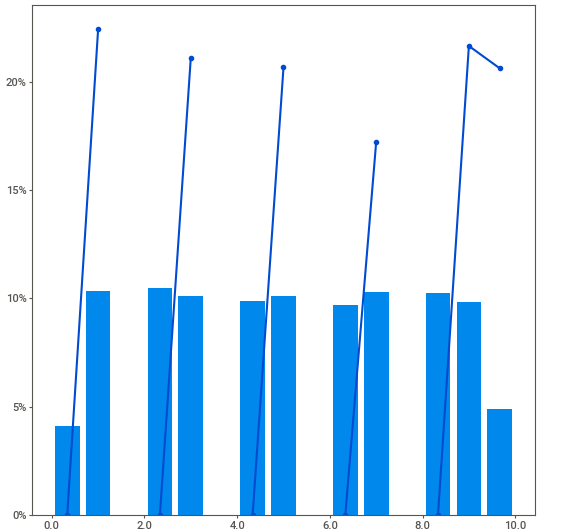
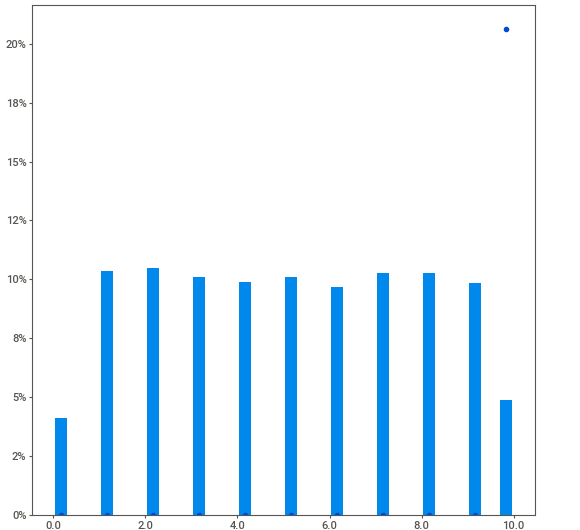
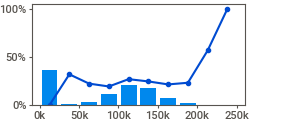
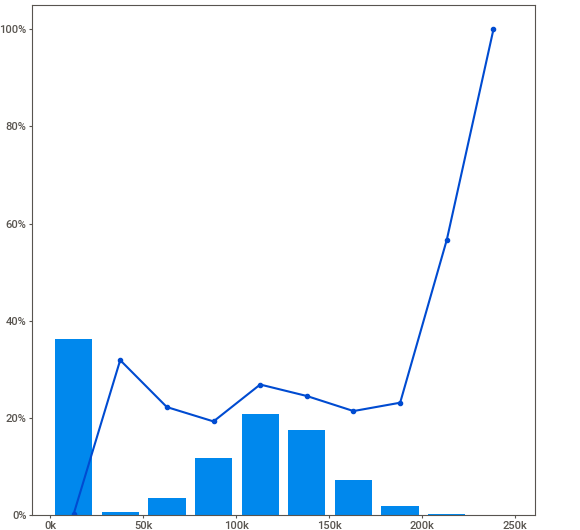
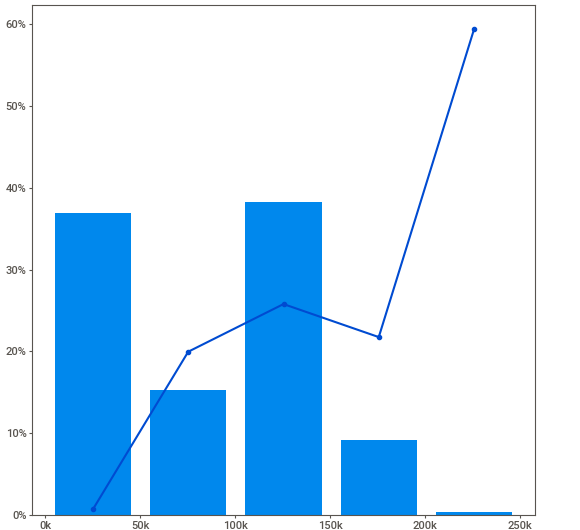
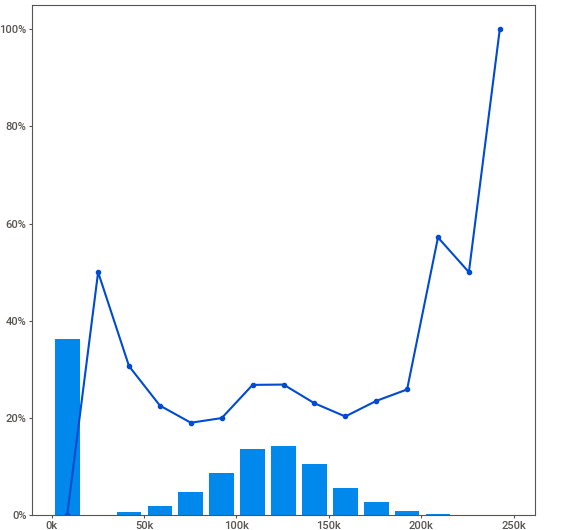
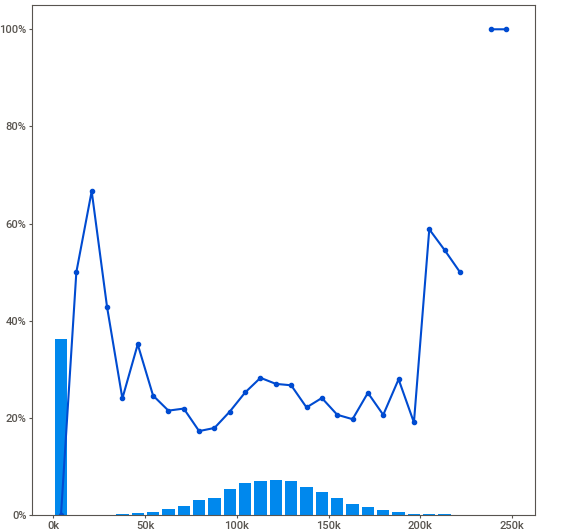
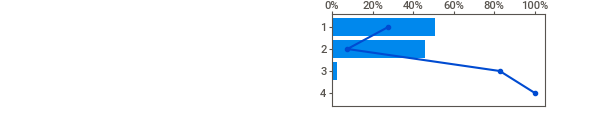
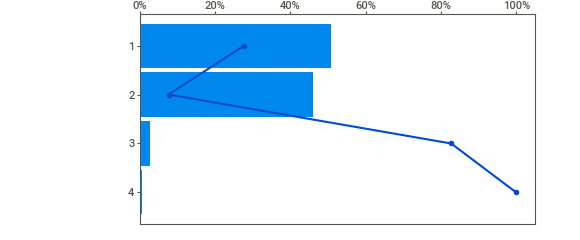
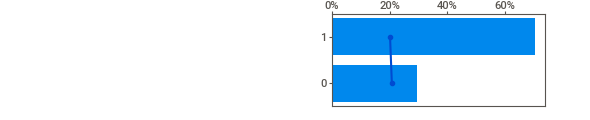
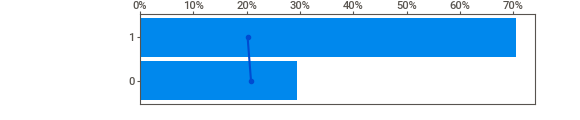
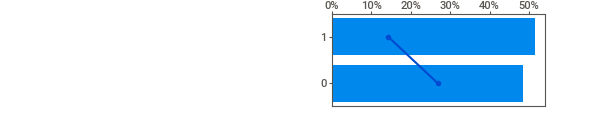
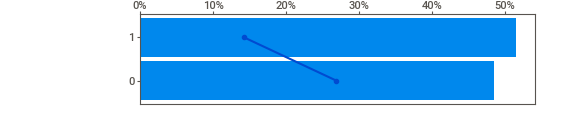
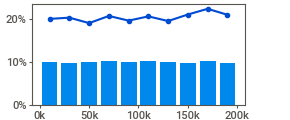
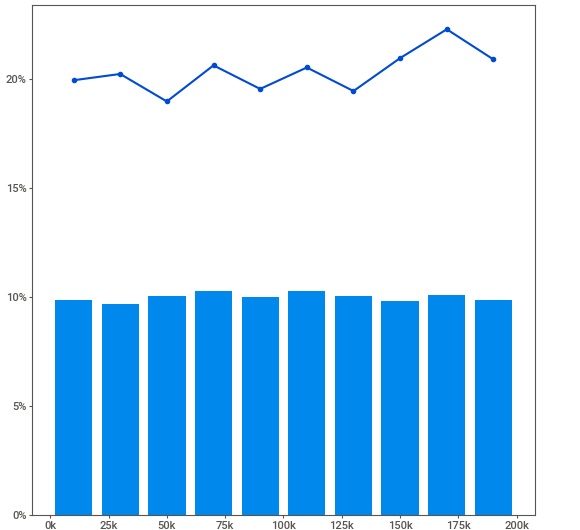
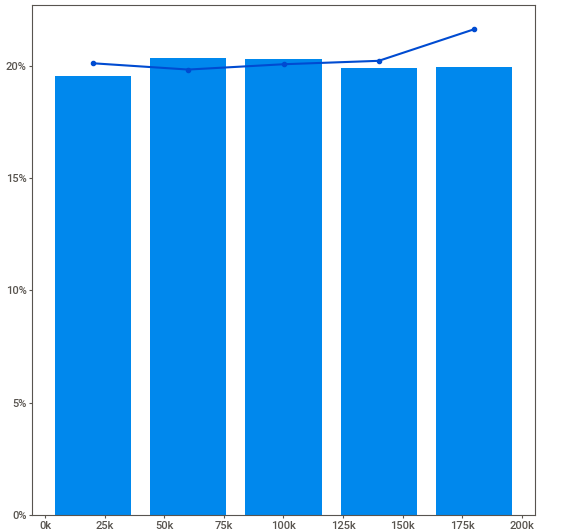
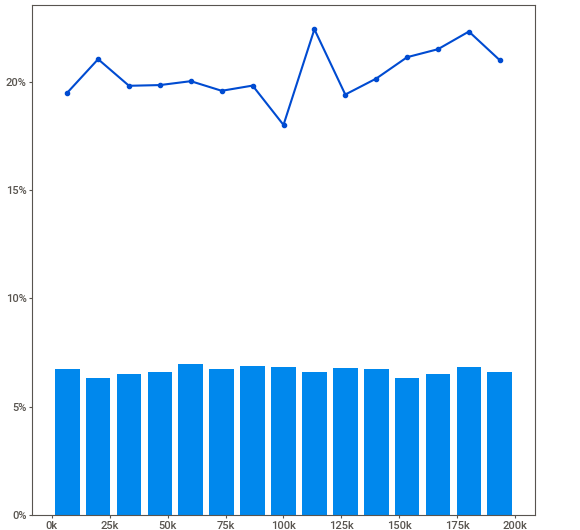
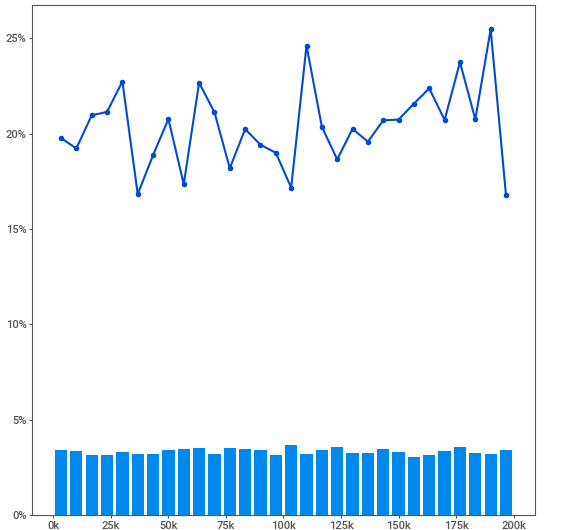
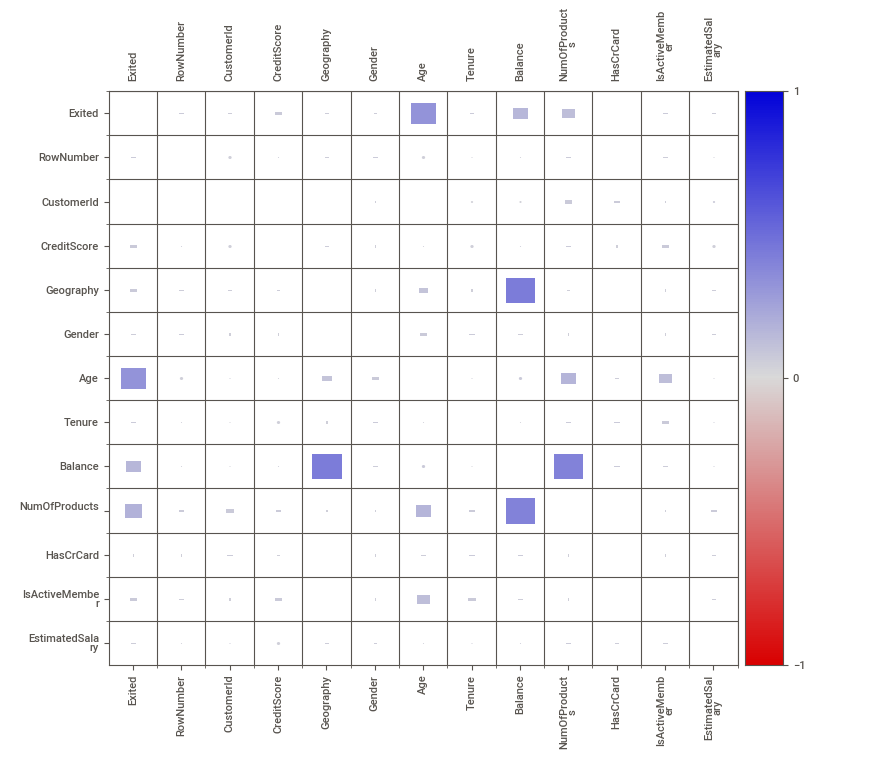
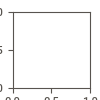

In [13]:
import sweetviz 

my_report = sweetviz.analyze([df, "original data"],target_feat='Exited')

my_report.show_notebook(layout="vertical", w ="980", h= 700, scale= .8)

In [14]:
df.isnull().sum().any()

False

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [17]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [18]:
df["CreditScore"].sort_values().unique()
# df.CreditScore.value_counts(dropna=False)

array([350, 351, 358, 359, 363, 365, 367, 373, 376, 382, 383, 386, 395,
       399, 401, 404, 405, 407, 408, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494,
       495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507,
       508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
       521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533,
       534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546,
       547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559,
       560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 57

In [19]:
# df["Geography"].sort_values().unique()
df.Geography.value_counts(dropna=False)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [20]:
# df["Gender"].sort_values().unique()
df.Gender.value_counts(dropna=False)
 

Male      5457
Female    4543
Name: Gender, dtype: int64

In [21]:
df["Age"].sort_values().unique()
# df.Age.value_counts(dropna=False)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92])

In [22]:
# df["Tenure"].sort_values().unique()
df.Tenure.value_counts(dropna=False)

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [23]:
# df["Balance"].sort_values().unique()
df.Balance.value_counts(dropna=False)

0.000         3617
130170.820       2
105473.740       2
85304.270        1
159397.750       1
              ... 
81556.890        1
112687.690       1
108698.960       1
238387.560       1
130142.790       1
Name: Balance, Length: 6382, dtype: int64

In [24]:
# df["NumOfProducts"].sort_values().unique()
df.NumOfProducts.value_counts(dropna=False)

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [25]:
# df["EstimatedSalary"].sort_values().unique()
df.EstimatedSalary.value_counts(dropna=False)

24924.920     2
101348.880    1
55313.440     1
72500.680     1
182692.800    1
             ..
120893.070    1
188377.210    1
55902.930     1
4523.740      1
38190.780     1
Name: EstimatedSalary, Length: 9999, dtype: int64

In [26]:
# df["HasCrCard"].sort_values().unique()
df.HasCrCard.value_counts(dropna=False)

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [27]:
# df["IsActiveMember"].sort_values().unique()
df.IsActiveMember.value_counts(dropna=False)

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [28]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [29]:
missing (df)
#df.isnull().sum()
# df.isnull().sum()/len(df) 

,Missing_Number,Missing_Percent
CreditScore,0,0.000
Geography,0,0.000
Gender,0,0.000
Age,0,0.000
Tenure,0,0.000
Balance,0,0.000
NumOfProducts,0,0.000
HasCrCard,0,0.000
IsActiveMember,0,0.000
EstimatedSalary,0,0.000


In [30]:
df_temp = df.corr()  #multicolinearityi görebilmek için

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .90 and df_temp[col][i] < 1) or (df_temp[col][i]< -.90 and df_temp[col][i] > -1) : 
                feature.append(col)
                collinear.append(i)
                print(f"multicolinearity alert in between {col} - {i}")

In [31]:
df_temp

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


In [32]:
# df["Exited"].sort_values().unique()
df.Exited.value_counts(dropna=False)

0    7963
1    2037
Name: Exited, dtype: int64

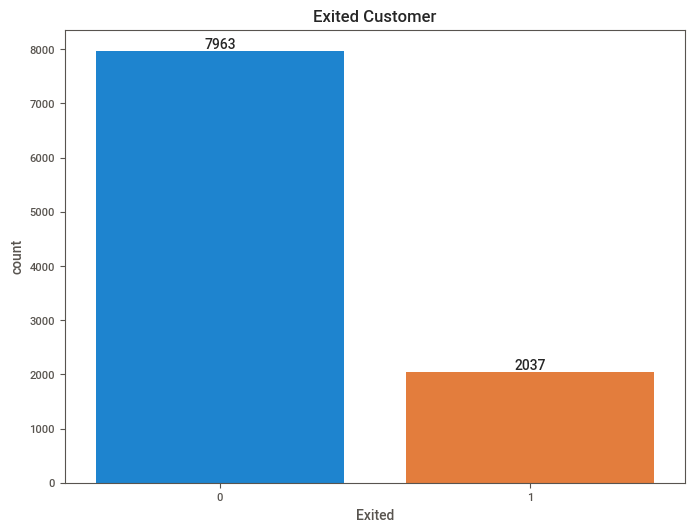

In [33]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x ='Exited', data = df)
plt.title('Exited Customer')
ax.bar_label(ax.containers[0]);

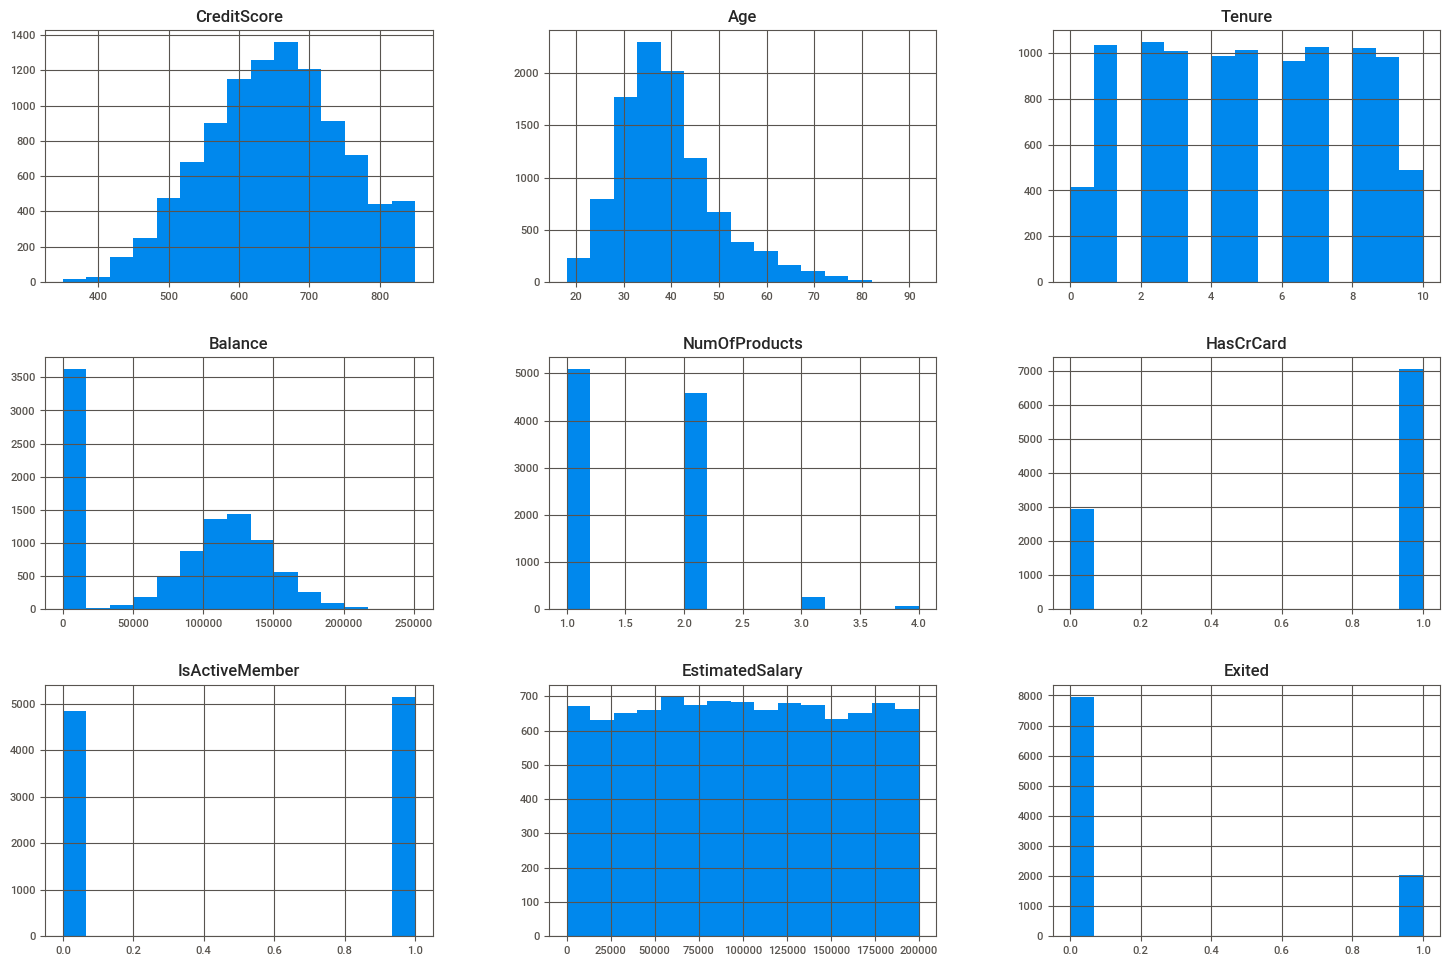

In [34]:
df.hist(figsize=(18, 12), bins=15);

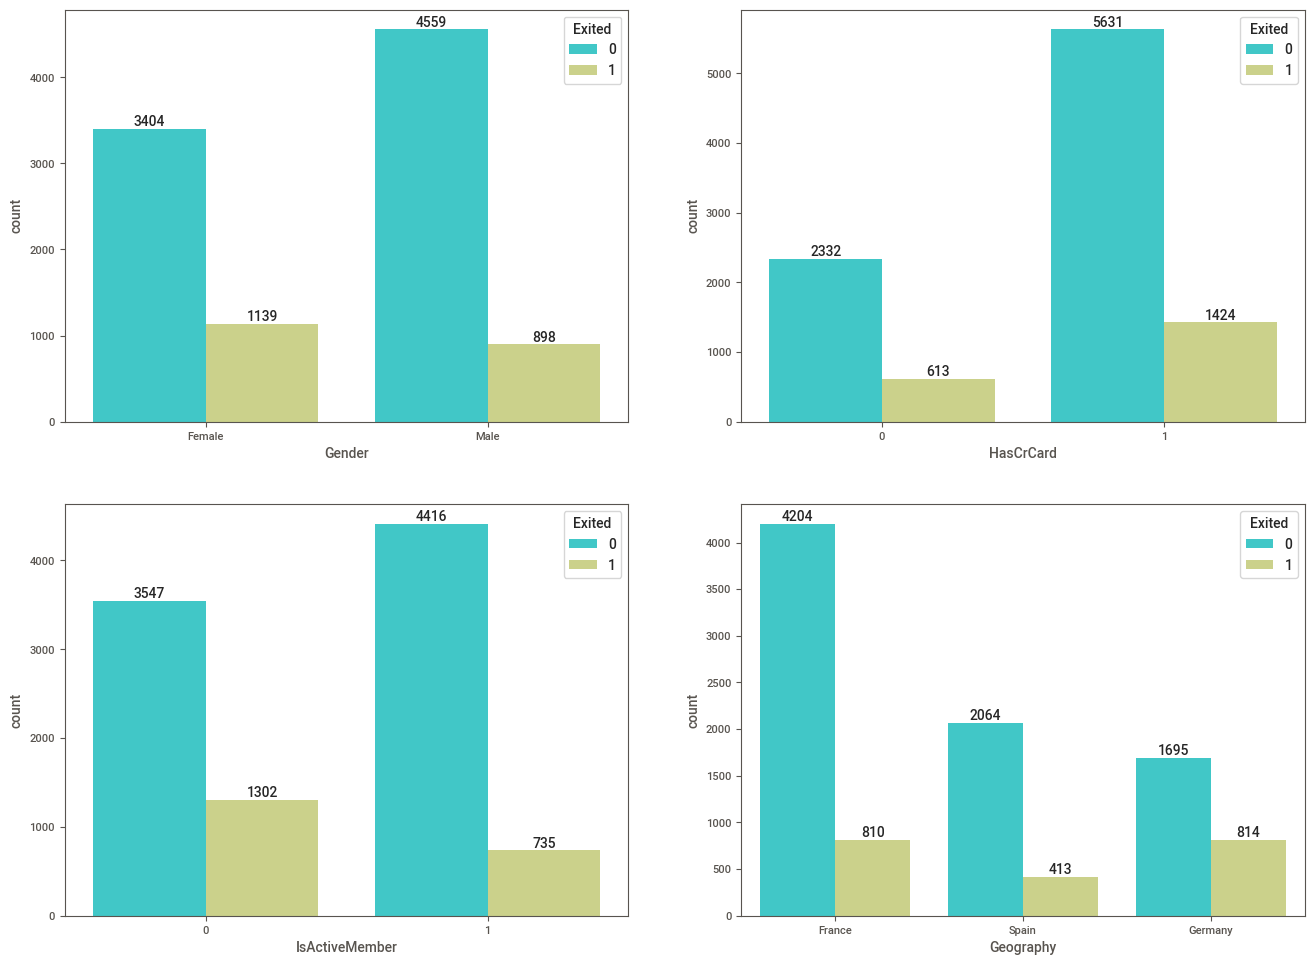

In [35]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    ax=sns.countplot(data=df, x=i, hue="Exited", palette="rainbow")
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])

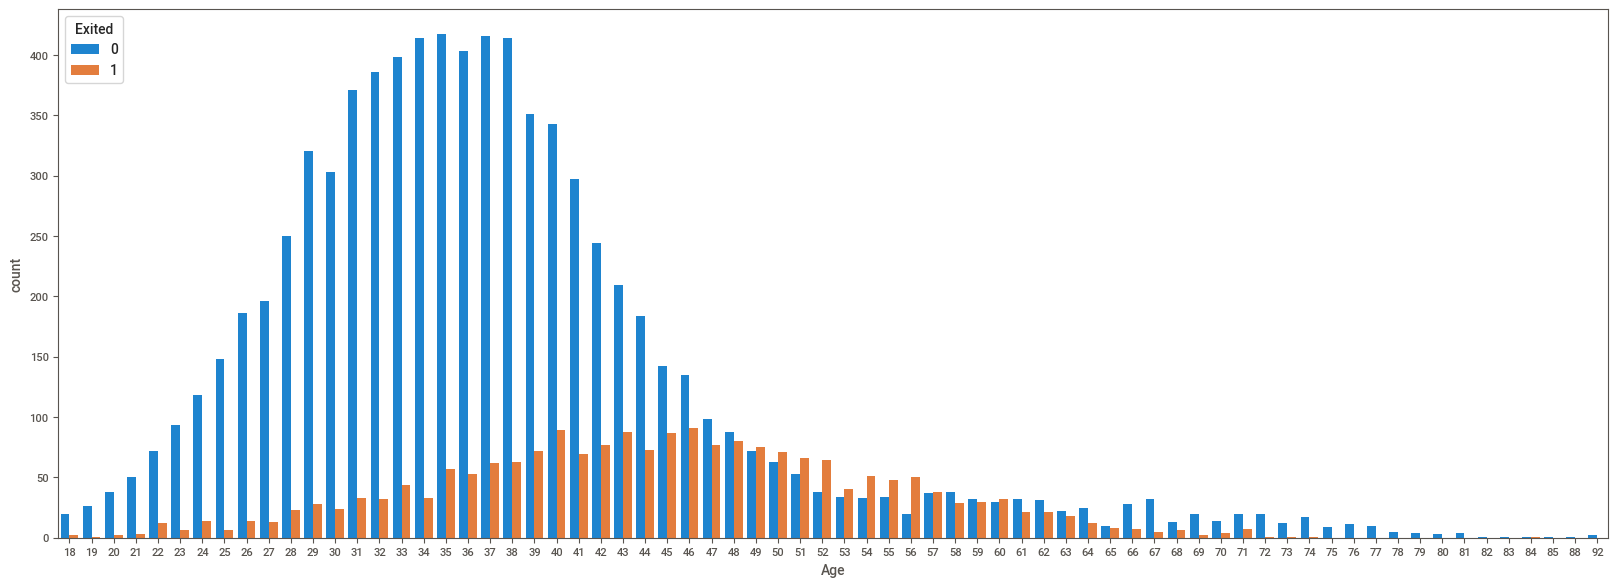

In [36]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

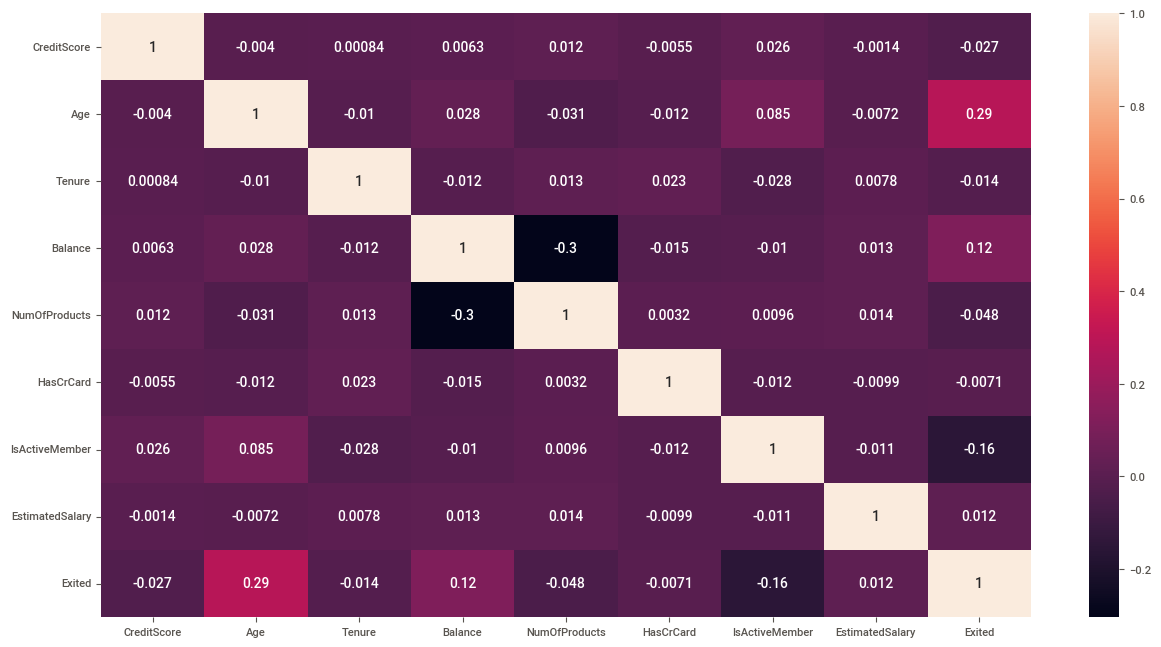

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

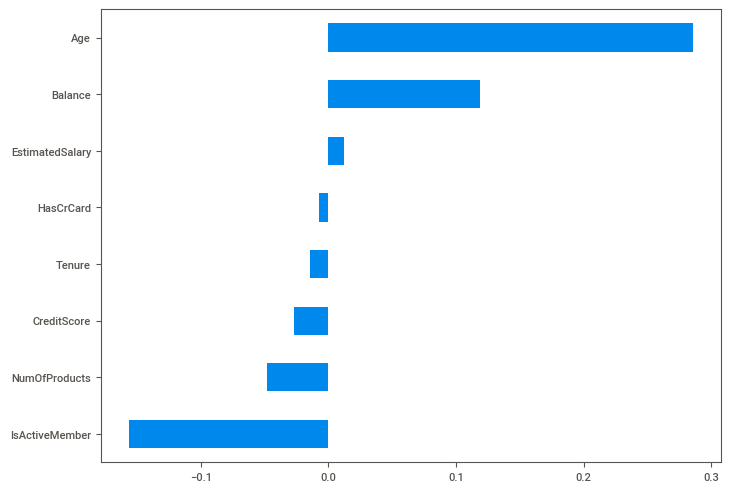

In [38]:
plt.figure(figsize = (8,6))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

In [39]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

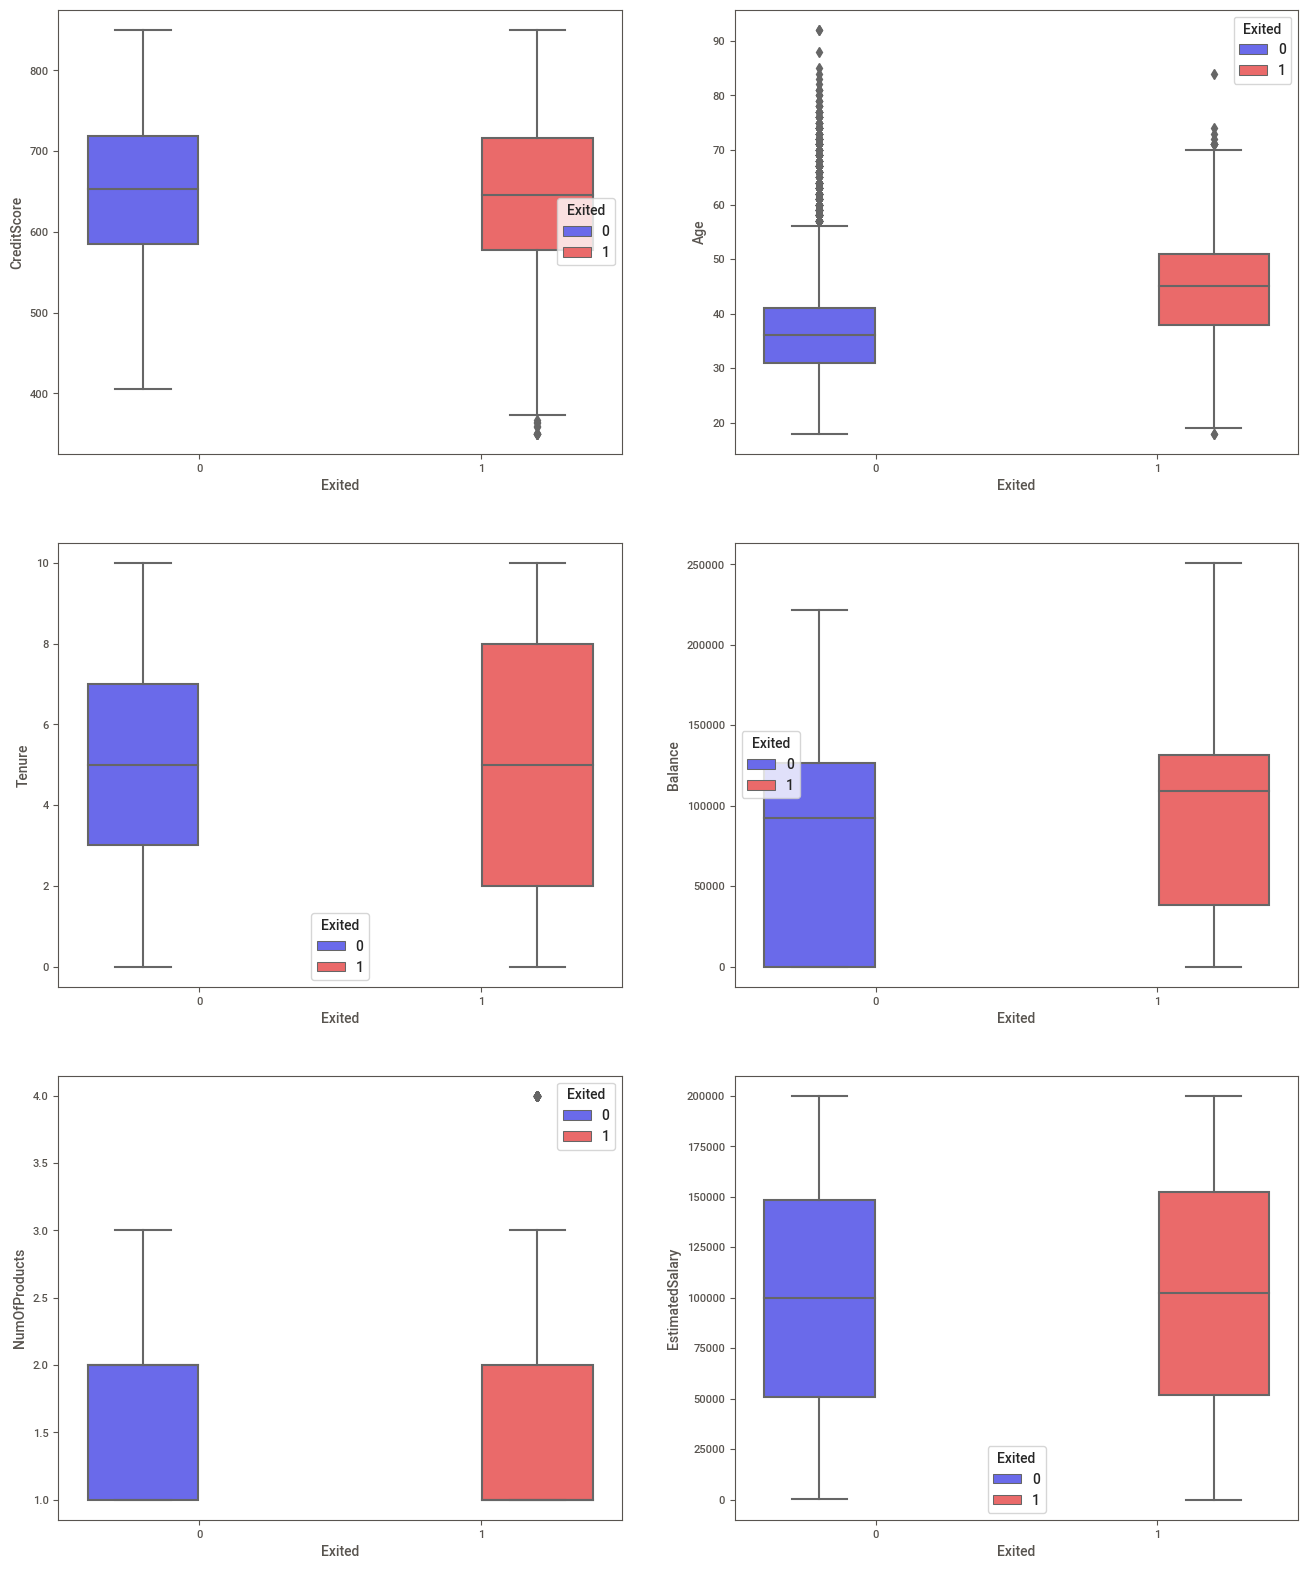

In [40]:
features=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', "NumOfProducts", 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']
fig, axarr = plt.subplots(3,2 , figsize=(16, 20))
ax= sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0],palette = "seismic")
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][1],palette = 'seismic')
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0],palette = 'seismic')
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df , ax=axarr[1][1],palette = 'seismic')
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0],palette = 'seismic')
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1],palette = 'seismic')
plt.show()

In [41]:
df=pd.get_dummies(df)

In [42]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0


In [43]:
df_temp = df.corr()  #multicolinearityi görebilmek için

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]> .90 and df_temp[col][i] < 1) or (df_temp[col][i]< -.90 and df_temp[col][i] > -1) : 
                feature.append(col)
                collinear.append(i)
                print(f"multicolinearity alert in between {col} - {i}")

multicolinearity alert in between Gender_Female - Gender_Male
multicolinearity alert in between Gender_Male - Gender_Female


In [44]:
df.sample(10).T

,6155,3827,854,9235,1290,6893,662,8001,9473,5594
CreditScore,759.000,794.000,675.000,462.000,653.000,578.000,678.000,707.000,608.000,688.000
Age,26.000,57.000,57.000,27.000,31.000,50.000,31.000,32.000,45.000,40.000
Tenure,4.000,3.000,8.000,4.000,9.000,5.000,2.000,9.000,4.000,6.000
Balance,0.000,117056.460,0.000,176913.520,143321.970,151215.340,0.000,0.000,0.000,0.000
NumOfProducts,2.000,1.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,1.000
HasCrCard,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000
IsActiveMember,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
EstimatedSalary,135394.620,93336.930,95463.290,80587.270,83679.460,169804.400,58803.280,126475.790,36697.480,47886.440
Exited,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
Geography_France,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000


In [45]:
df2=df.copy()

## Preprocessing of Data
- Train | Test Split, Scalling

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [48]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,1,0


In [49]:
seed = 42

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [51]:
X_train.shape

(9000, 13)

In [52]:
X_test.shape

(1000, 13)

In [53]:
scaler = MinMaxScaler()

In [54]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from tensorflow.keras.optimizers import Adadelta, RMSprop, Nadam, Adam, SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### Creating Model

### without class_weigth

In [56]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation = "relu", input_dim = X_train.shape[1])) # input dim burada oluşturunca ağırlıklar atanıyor.
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) # binary olduğundan sigmoid kullandın

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [57]:
early_stop = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=15, restore_best_weights = True)

#### Evaluate

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, verbose=1, callbacks = [early_stop])

Epoch 1/200
254/254 [==============================] - 3s 7ms/step - loss: 0.5099 - recall: 0.0212 - val_loss: 0.4660 - val_recall: 0.0000e+00
Epoch 2/200
254/254 [==============================] - 1s 5ms/step - loss: 0.4653 - recall: 0.0400 - val_loss: 0.4413 - val_recall: 0.0884
Epoch 3/200
254/254 [==============================] - 1s 4ms/step - loss: 0.4458 - recall: 0.0914 - val_loss: 0.4177 - val_recall: 0.1657
Epoch 4/200
254/254 [==============================] - 1s 4ms/step - loss: 0.4335 - recall: 0.1677 - val_loss: 0.4080 - val_recall: 0.2873
Epoch 5/200
254/254 [==============================] - 1s 4ms/step - loss: 0.4278 - recall: 0.2167 - val_loss: 0.4030 - val_recall: 0.2431
Epoch 6/200
254/254 [==============================] - 1s 3ms/step - loss: 0.4223 - recall: 0.2173 - val_loss: 0.3967 - val_recall: 0.3260
Epoch 7/200
254/254 [==============================] - 1s 4ms/step - loss: 0.4156 - recall: 0.2548 - val_loss: 0.3906 - val_recall: 0.2873
Epoch 8/200
254/254 [==

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                336       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 881
Trainable params: 881
Non-trainable params: 0
_________________________________________________________________


In [60]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.510,0.021,0.466,0.000
1,0.465,0.040,0.441,0.088
2,0.446,0.091,0.418,0.166
3,0.434,0.168,0.408,0.287
4,0.428,0.217,0.403,0.243


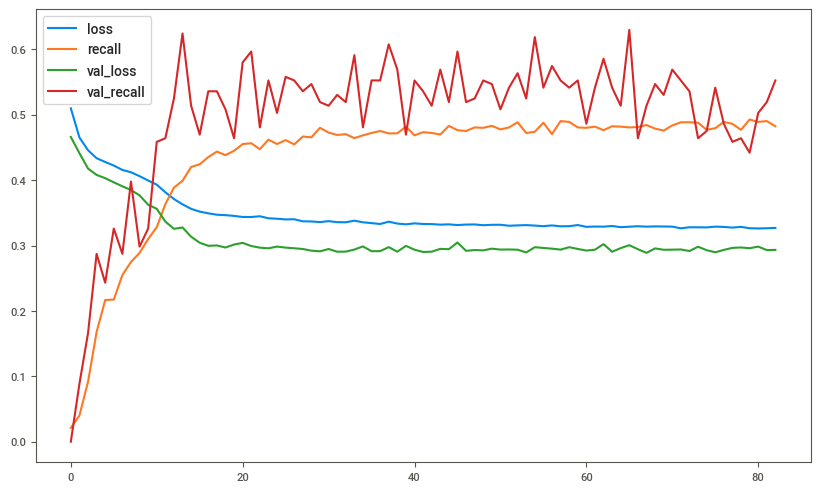

In [61]:
loss_df.plot();

In [62]:
model.evaluate(X_test, y_test, verbose=0)

[0.33271920680999756, 0.44607841968536377]

In [63]:
y_pred = (model.predict(X_test) > 0.5).astype("int32") # binaryde predict deyince sadece 1 olma olasılığını döndürüyor. 0.5 büyük deyince true-false yapıyor- astype yapınca 0 ve 1 çeviriyor.
#y_pred = model.predict_classes(X_test) bu fonkisyon tensorflow 2.05 kadar kullanılıyordu, şuan kullanılmıyor.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[769  27]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.45      0.57       204

    accuracy                           0.86      1000
   macro avg       0.82      0.71      0.74      1000
weighted avg       0.85      0.86      0.84      1000



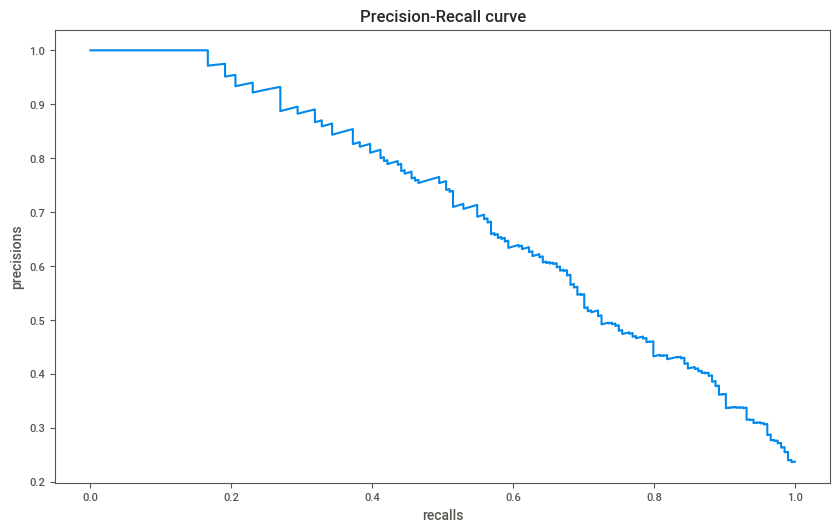

In [64]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [65]:
average_precision_score(y_test, y_pred_proba)

0.7041855787366424

### with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [66]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights
# class_weight = {0:1, 1:1.5}

{0: 0.6278777731268314, 1: 2.454991816693944}

In [67]:

early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience =20, restore_best_weights = True) 

In [68]:
model_w = Sequential()

tf.random.set_seed(seed)

model_w.add(Dense(16, activation="relu"))
model_w.add(Dense(8, activation="relu"))
model_w.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model_w.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"]) 

In [69]:
model_w.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, class_weight=class_weights, epochs = 200, verbose = 1,
          callbacks = [early_stop])

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 0.6831 - recall: 0.4001 - val_loss: 0.6520 - val_recall: 0.5525
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6614 - recall: 0.5490 - val_loss: 0.6359 - val_recall: 0.6243
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6457 - recall: 0.5993 - val_loss: 0.5955 - val_recall: 0.6133
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6330 - recall: 0.6350 - val_loss: 0.5751 - val_recall: 0.6077
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6231 - recall: 0.6410 - val_loss: 0.6182 - val_recall: 0.7348
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 0.6136 - recall: 0.6677 - val_loss: 0.5608 - val_recall: 0.6575
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 0.6056 - recall: 0.6604 - val_loss: 0.5899 - val_recall: 0.7293
Epoch 8/200
64/64 [======================

#### Evaluate

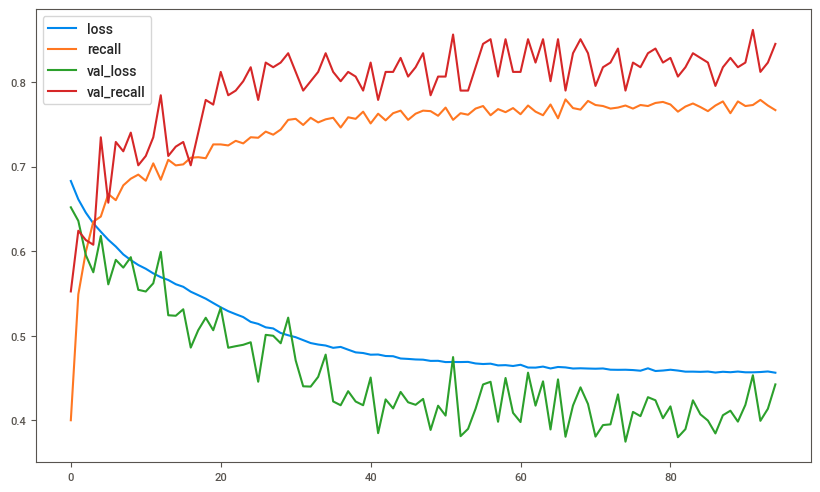

In [70]:
loss_df = pd.DataFrame(model_w.history.history)
loss_df.plot();

In [71]:
loss, accuracy = model_w.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4193599820137024
accuracy :  0.7352941036224365


In [72]:
y_pred = (model_w.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[652 144]
 [ 54 150]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       796
           1       0.51      0.74      0.60       204

    accuracy                           0.80      1000
   macro avg       0.72      0.78      0.74      1000
weighted avg       0.84      0.80      0.81      1000



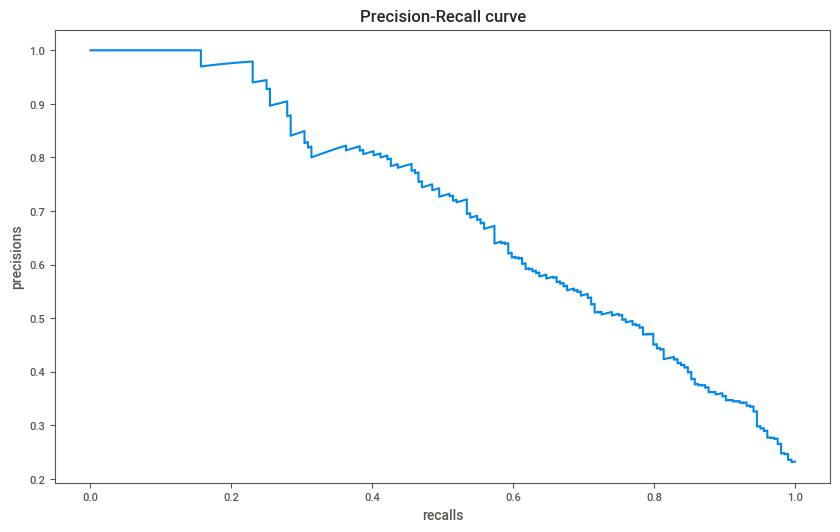

In [73]:
y_pred_proba = model_w.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show();

## crossvalidate

In [74]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [75]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 26, activation = 'relu'))
    classifier.add(Dense(units = 13, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [76]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 5)

df_scores = pd.DataFrame(scores, index = range(1, 6)).iloc[:, 2:]

df_scores

,test_accuracy,test_precision,test_recall,test_f1
1,0.855,0.806,0.415,0.548
2,0.862,0.790,0.475,0.593
3,0.854,0.708,0.412,0.521
4,0.864,0.748,0.450,0.562
5,0.861,0.784,0.456,0.577


In [77]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.859,0.004
pre,0.767,0.040
rec,0.442,0.027
f1,0.560,0.028


## GridSearchCV

In [78]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [99]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [100]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15, restore_best_weights = True )

In [101]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200, class_weight=class_weights )

parameters = {'batch_size': [64,128,256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 5,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Epoch 1/200
32/32 [==============================] - 1s 11ms/step - loss: 0.6884 - recall: 0.3293 - val_loss: 0.6561 - val_recall: 0.4641
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6724 - recall: 0.4964 - val_loss: 0.6450 - val_recall: 0.5746
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6611 - recall: 0.5502 - val_loss: 0.6310 - val_recall: 0.5856
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6512 - recall: 0.5738 - val_loss: 0.6164 - val_recall: 0.6133
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6427 - recall: 0.5769 - val_loss: 0.6346 - val_recall: 0.7238
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6345 - recall: 0.6519 - val_loss: 0.5899 - val_recall: 0.6243
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6283 - recall: 0.6211 - val_loss: 0.6144

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f0264ab6d10>,
             n_jobs=-1,
             param_grid={'batch_size': [64, 128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [102]:
grid_model.best_score_

0.711507187198819

In [149]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.001,
 'optimizer': keras.optimizer_v2.adam.Adam}

In [104]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]] # .sort_values() 
grid_result  # grid_result.sort_values(by='rank_test_score')

,mean_test_score,std_test_score,rank_test_score,params
0,0.683,0.045,5,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
1,0.654,0.020,18,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
2,0.434,0.359,32,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
3,0.691,0.045,4,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
4,0.675,0.027,8,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
5,0.591,0.033,28,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
6,0.319,0.273,35,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
7,0.669,0.029,14,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
8,0.677,0.025,7,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
9,0.570,0.061,29,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."


In [148]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[652 144]
 [ 57 147]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       796
           1       0.51      0.72      0.59       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.84      0.80      0.81      1000



#### Evaluate

## ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

for keras model

In [107]:
roc_auc_score(y_test, y_pred_proba)

0.7698418563405262


for Gridsearch model

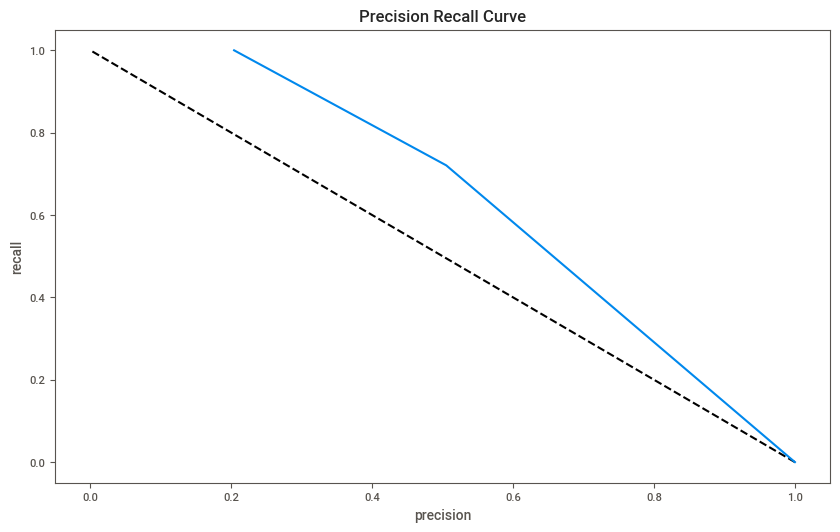

In [108]:
y_pred_proba = grid_model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show();

Roc curve

In [88]:
# y_pred_proba = grid_model.predict_proba(X_test)[:,1]
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.plot([0,1],[0,1],'k--')
# plt.plot(fpr,tpr, label='ANN')
# plt.xlabel('fpr')
# plt.ylabel('tpr')
# plt.title('ROC curve')
# plt.show()

## Final Model and Model Deployment

In [151]:
import pickle
pickle.dump(scaler, open("scaler_churn_ANN", 'wb'))

In [169]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [170]:
# class_weight = {0:1, 1:1.5}
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20, restore_best_weights = True ) 

In [173]:
tf.random.set_seed(seed)

final_model = Sequential()
final_model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1])) 
final_model.add(Dense(8, activation = "relu"))
final_model.add(Dense(1, activation = "sigmoid")) 

opt = Adam(lr = 0.001)
final_model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [174]:
final_model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 256, class_weight=class_weights, epochs = 200, verbose = 1, # predicte validation data ile  kullanıyorsun, 
          callbacks = [early_stop])

Epoch 1/200
36/36 [==============================] - 1s 10ms/step - loss: 0.6869 - recall: 0.3235 - val_loss: 0.6602 - val_recall: 0.4510
Epoch 2/200
36/36 [==============================] - 0s 4ms/step - loss: 0.6696 - recall: 0.4932 - val_loss: 0.6523 - val_recall: 0.5098
Epoch 3/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6574 - recall: 0.5352 - val_loss: 0.6472 - val_recall: 0.5441
Epoch 4/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6466 - recall: 0.5848 - val_loss: 0.6401 - val_recall: 0.5980
Epoch 5/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6375 - recall: 0.6187 - val_loss: 0.6509 - val_recall: 0.6471
Epoch 6/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6295 - recall: 0.6350 - val_loss: 0.6319 - val_recall: 0.5980
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.6226 - recall: 0.6476 - val_loss: 0.6224 - val_recall: 0.5882
Epoch 8/200
36/36 [=====================

<AxesSubplot:>

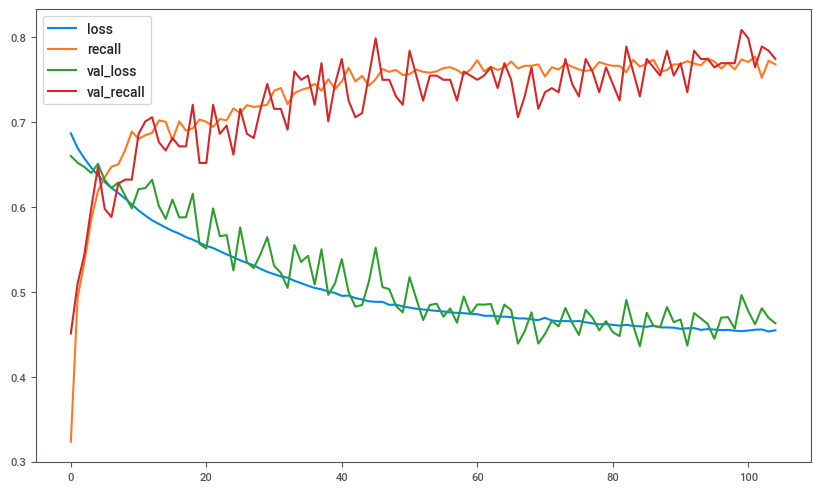

In [175]:
loss_df = pd.DataFrame(final_model.history.history)
loss_df.plot()

In [176]:
final_model.evaluate(X_test, y_test, verbose=0)

[0.43587547540664673, 0.7303921580314636]

In [177]:
loss, accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.43587547540664673
accuracy :  0.7303921580314636


In [178]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[638 158]
 [ 55 149]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.49      0.73      0.58       204

    accuracy                           0.79      1000
   macro avg       0.70      0.77      0.72      1000
weighted avg       0.83      0.79      0.80      1000



In [183]:
final_model.save('model_churn_prediction_ANN.h5')

### Prediction

In [184]:
from tensorflow.keras.models import load_model

In [185]:
df


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,0,1,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,0,1,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,0,1,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,1,0,0,0,1
9996,516,35,10,57369.610,1,1,1,101699.770,0,1,0,0,0,1
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,0,1,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,0,1


In [186]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pickle.dump(scaler, open("scaler_kc_house", 'wb'))

In [187]:
model_churn = load_model('model_churn_prediction_ANN.h5')
scaler_churn = pickle.load(open("scaler_churn_ANN", "rb"))

In [188]:
my_dict = {"CreditScore":[619], "Gender": ["Female"],	"Age": [42],	"Tenure":[2], "Balance":[0.000],
           "NumOfProducts": [1], "HasCrCard":[1], "IsActiveMember":[1],  "EstimatedSalary": [101348.880], "Geography": ["France"]}

In [189]:
sample = pd.DataFrame(my_dict)
sample

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography
0,619,Female,42,2,0.000,1,1,1,101348.880,France


In [190]:
sample_dummy=pd.get_dummies(sample)

In [191]:
sample = sample.reindex(columns=X.columns, fill_value=0)
sample

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0,0,0


In [192]:
sample_scaled = scaler_churn.transform(sample)
sample_scaled

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00]])

In [193]:
model_churn.predict(sample_scaled)

array([[0.]], dtype=float32)

second prediction


In [199]:
single_customer = df.drop('Exited', axis=1).iloc[1]
single_customer

CreditScore            608.000
Age                     41.000
Tenure                   1.000
Balance              83807.860
NumOfProducts            1.000
HasCrCard                0.000
IsActiveMember           1.000
EstimatedSalary     112542.580
Geography_France         0.000
Geography_Germany        0.000
Geography_Spain          1.000
Gender_Female            1.000
Gender_Male              0.000
Name: 1, dtype: float64

In [200]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 13))
single_customer

array([[6.0800000e+02, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00]])

In [201]:
y_pred =(model_churn.predict(single_customer) > 0.5).astype("int32")
y_pred

array([[0]], dtype=int32)

In [202]:
df["Exited"].iloc[1]

0